# Modis Vegetation Index - Continued (Completed)

**This notebook contains the code to complete all tasks, except for task 7 which is more open ended

Today, we continue to look into Modis data and you get to do all the work. 

### Task 1: Import all the modules that we need

In [2]:
# We need the same libraries as the last time and can just copy them over

import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import glob

### Task 2: Load the MODIS Vegetation Index Dataset

#### Task 2.1:

Before you load the dataset, use `glob` to see what files are now located in the _data_-folder and only load the Vegetation Index dataset. 

In [4]:
# using glob we see that we are no matching additional files that were added to the data folder
files = glob.glob(r'../data/*_10km.nc')
files

['../data\\MOD13A3.061_1km_aid0001_latlon_2020_10km.nc',
 '../data\\MOD13A3.061_1km_aid0001_latlon_2021_10km.nc',
 '../data\\MOD13A3.061_1km_aid0001_latlon_2022_10km.nc',
 '../data\\MOD13A3.061_1km_aid0001_latlon_2023_10km.nc',
 '../data\\MOD16A2GF.061_500m_aid0001_latlon_2020_10km.nc',
 '../data\\MOD16A2GF.061_500m_aid0001_latlon_2021_10km.nc',
 '../data\\MOD16A2GF.061_500m_aid0001_latlon_2022_10km.nc',
 '../data\\MOD16A2GF.061_500m_aid0001_latlon_2023_10km.nc']

In [5]:
# if we only want to match the old files, we need to modify our query to select only the Vegetation index files.
# One way to do this is to select on the MODIS Product ID
files = glob.glob(r'../data/MOD13A3*_10km.nc')
files

['../data\\MOD13A3.061_1km_aid0001_latlon_2020_10km.nc',
 '../data\\MOD13A3.061_1km_aid0001_latlon_2021_10km.nc',
 '../data\\MOD13A3.061_1km_aid0001_latlon_2022_10km.nc',
 '../data\\MOD13A3.061_1km_aid0001_latlon_2023_10km.nc']

In [6]:
# We can now load the data, because we need multiple files we us xr.open_mfdataset()
ds = xr.open_mfdataset(files)
ds['time']=ds.indexes['time'].to_datetimeindex() # Xarray has a small problem with the time index in the original form. This fixes it.  
ds

C:\Users\tobia\AppData\Local\Temp\ipykernel_33872\2896129425.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time']=ds.indexes['time'].to_datetimeindex() # Xarray has a small problem with the time index in the original form. This fixes it.


<xarray.Dataset> Size: 704MB
Dimensions:                               (time: 48, lat: 357, lon: 790)
Coordinates:
  * time                                  (time) datetime64[ns] 384B 2020-01-...
  * lat                                   (lat) float64 3kB 50.81 ... 21.14
  * lon                                   (lon) float64 6kB -128.9 ... -63.13
Data variables:
    crs                                   (time) int8 48B -127 -127 ... -127
    _1_km_monthly_EVI                     (time, lat, lon) float32 54MB dask.array<chunksize=(12, 357, 790), meta=np.ndarray>
    _1_km_monthly_MIR_reflectance         (time, lat, lon) float32 54MB dask.array<chunksize=(12, 357, 790), meta=np.ndarray>
    _1_km_monthly_NDVI                    (time, lat, lon) float32 54MB dask.array<chunksize=(12, 357, 790), meta=np.ndarray>
    _1_km_monthly_NIR_reflectance         (time, lat, lon) float32 54MB dask.array<chunksize=(12, 357, 790), meta=np.ndarray>
    _1_km_monthly_VI_Quality              (time, lat, lon) float64 108MB dask.array<chunksize=(12, 357, 790), meta=np.ndarray>
    _1_km_monthly_blue_reflectance        (time, lat, lon) float32 54MB dask.array<chunksize=(12, 357, 790), meta=np.ndarray>
    _1_km_monthly_pixel_reliability       (time, lat, lon) float64 108MB dask.array<chunksize=(12, 357, 790), meta=np.ndarray>
    _1_km_monthly_red_reflectance         (time, lat, lon) float32 54MB dask.array<chunksize=(12, 357, 790), meta=np.ndarray>
    _1_km_monthly_relative_azimuth_angle  (time, lat, lon) float32 54MB dask.array<chunksize=(12, 357, 790), meta=np.ndarray>
    _1_km_monthly_sun_zenith_angle        (time, lat, lon) float32 54MB dask.array<chunksize=(12, 357, 790), meta=np.ndarray>
    _1_km_monthly_view_zenith_angle       (time, lat, lon) float32 54MB dask.array<chunksize=(12, 357, 790), meta=np.ndarray>
Attributes:
    title:        MOD13A3.061 for aid0001
    Conventions:  CF-1.6
    institution:  Land Processes Distributed Active Archive Center (LP DAAC)
    source:       AppEEARS v3.48
    references:   See README.md
    history:      See README.md

### Task 3: Make a plot for EVI

#### Task 3.1: Save EVI as a new dataset

Inspect the dataset to indentify the variable name for EVI

In [9]:
# Select EVI
# looking into the ds above, we find that the EVI data is stored in the data-array with name '_1_km_monthly_EVI', 
# which we then select and save to a new variable
EVI = ds['_1_km_monthly_EVI']

#### Task 3.2: Plot a map/ maps of EVI

Decide on how the plot should look like. Maybe you want to switch up the colormap (`cmap=`). All available maps are found [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html#overview).


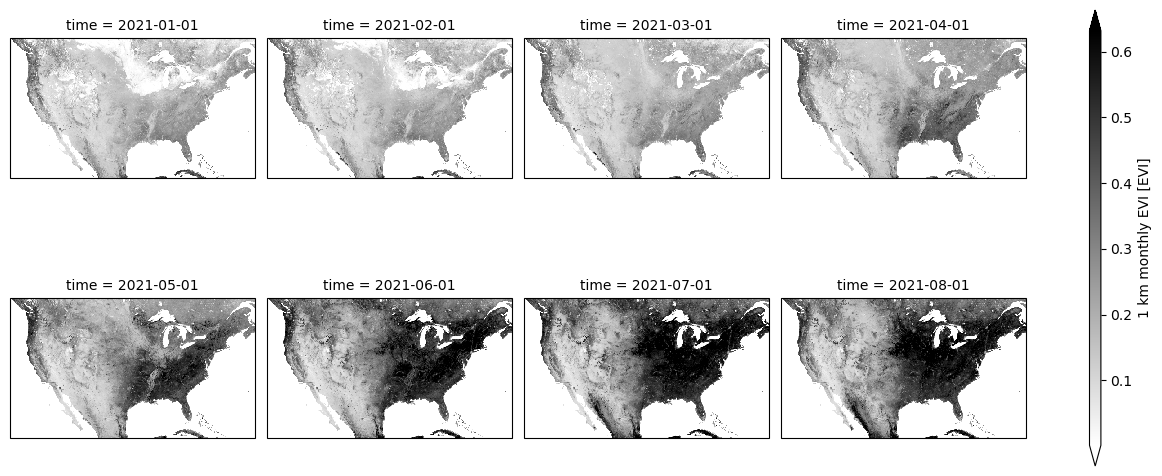

In [14]:
# I am creating a plot now similar to the NDVI one, but decided to switch it up a bit
# I am only plotting 8 months of data in two rows and also use a different colormap
# I also changed the location of the colormap from horizontal to vertical.
fig = EVI.sel(time=slice('2021-01-01','2021-8-31')).plot(
    col="time",
    col_wrap = 4,
    transform=ccrs.PlateCarree(),  # remember to provide this!
    subplot_kws={"projection": ccrs.Mercator()},
    cmap='gist_yarg',
    robust=True,
    cbar_kwargs={"orientation": "vertical", "shrink": 0.8, "aspect": 40},
)

### Task 4: Calculate EVI using the MODIS bands 

The [Enhanced Vegetation Index (EVI)](https://en.wikipedia.org/wiki/Enhanced_vegetation_index) is another popular vegetation index, that has some advantages over the NDVI. It is designed to "enhance the vegetation signal with improved sensitivity in high biomass regions and improved vegetation [...] and to reduce atmospheric influences".  

EVI is calculated as:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/200b046072bcb150ccc8dae9d5d2b9d4880f0597)

where:

-   NIR, Red, and Blue are atmospherically-corrected and partially atmosphere-corrected (Rayleigh and ozone absorption) surface reflectanc
-    L is the canopy background adjustment that addresses non-linear, differential NIR and red radiant transfer through a cano
- C1, C2 are the coefficients of the aerosol resistance term, which uses the blue band to correct for aerosol influences in the red band
- 
    G is a gain factor.

The coefficients adopted in the MODIS-EVI algorithm are: L=1, C1 = 6, C2 = 7.5, and G = 2.5. 

#### Task 4.1: Calculate EVI using the relevant MODIS bands 

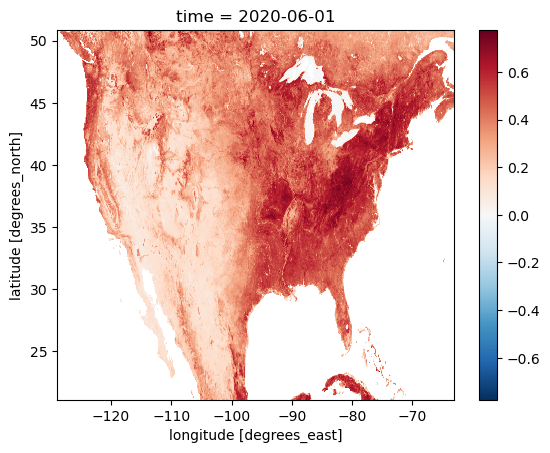

C:\Users\tobia\anaconda3\envs\ISAT420\Lib\site-packages\dask\core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


In [15]:
# We can calculate up EVI using the Modis bands and the constants
# This is similar to the NDVI calculation, but we add the blue band as well

NIR = ds['_1_km_monthly_NIR_reflectance'].sel(time = '2020-06-01')
Red = ds['_1_km_monthly_red_reflectance'].sel(time = '2020-06-01')
Blue = ds['_1_km_monthly_blue_reflectance'].sel(time = '2020-06-01')

L = 1
C1 = 6
C2=7.5
G = 2.5


OurEVI = G * (NIR-Red)/(NIR + C1 * Red - C2 * Blue + L)

# unprojected plot to check
OurEVI.plot()


#### Task 4.2: Compare your calculated EVI to the MODIS EVI product

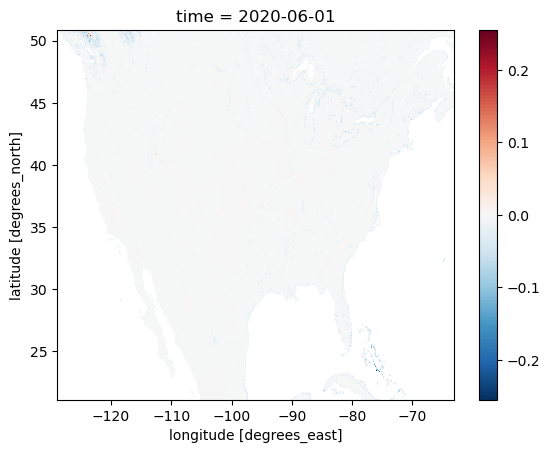

In [16]:
# We can compare them by taking the difference. We need to make sure that we are comparing for the right time
# We see very little difference
(EVI.sel(time = '2020-06-01')-OurEVI).plot()

# Task 5: Investigate the correlation between EVI and NDVI

(Hint: `xr.corr(<dataArray1>,<dataArray2>,dim = 'time')` will calculate the correlation along the time dimension.)
[`xaray.corr()` documentation](https://docs.xarray.dev/en/stable/generated/xarray.corr.html)

You can add several dimensions as a list (`dim = ['time', ...]`)

C:\Users\tobia\anaconda3\envs\ISAT420\Lib\site-packages\dask\core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


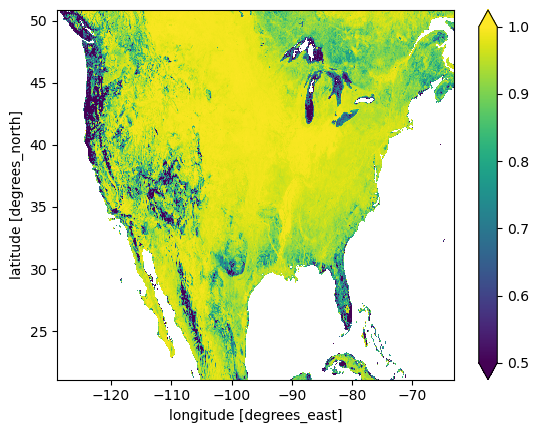

In [18]:
# We use xr.corr for the NDVI and EVI data-arrays
# calculating this over the time dimension, calculates the correlation at every location on the map
# the seem to be highly correlated except in wet areas or the SW US. 
xr.corr(ds['_1_km_monthly_NDVI'], ds['_1_km_monthly_EVI'],dim = ('time')).plot(vmin=0.5,vmax=1)

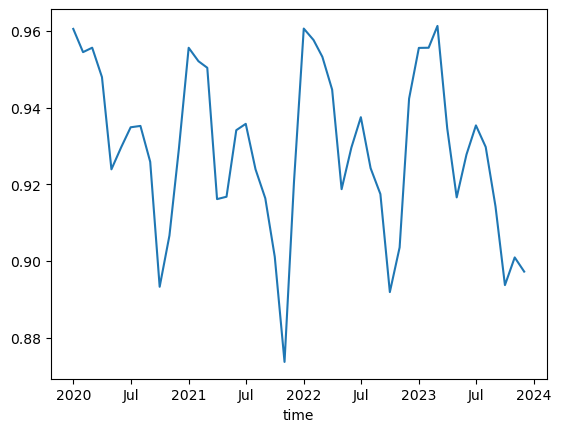

In [20]:
# calculating this over the time dimension, calculates the correlation at every location on the map
# calculating this aggregated over latitudes and longitudes shows the variation over the course of time
# there seems to be an annual cycle
xr.corr(ds['_1_km_monthly_NDVI'], ds['_1_km_monthly_EVI'],dim = ('lat','lon')).plot()


### Task 6: The _other_ MODIS dataset

You may have noticed before that another Modis dataset was added to the data folder. Load the dataset and try to find out what data it contains. 

(Hint: An overview of MODIS Land data products is found [here](https://ladsweb.modaps.eosdis.nasa.gov/#land). You can also google the dataset identifyer in the filenames, which starts with `MOD16`. 

In [22]:
# We can load the other dataset into a new variabl, by adjusting the string
ds2 = xr.open_mfdataset(r'../data/MOD16A2*latlon_*10km.nc')
ds2['time']=ds2.indexes['time'].to_datetimeindex() # Xarray has a small problem with the time index in the original form. This fixes it.  
ds2
# loading the data, we see that we have the same number of latitude and longitude points, but there are more times.
# Rather than being a monthly dataset, we have data every 8 days. 
# There are also other variables namely ET, LE and PLE. These are evapotranspiration, latent evaporation, and potential evaporation. 
# All of these are related to water fluxes.

C:\Users\tobia\AppData\Local\Temp\ipykernel_33872\432921525.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds2['time']=ds2.indexes['time'].to_datetimeindex() # Xarray has a small problem with the time index in the original form. This fixes it.


<xarray.Dataset> Size: 970MB
Dimensions:     (time: 172, lat: 357, lon: 790)
Coordinates:
  * time        (time) datetime64[ns] 1kB 2019-12-27 2020-01-01 ... 2023-11-25
  * lat         (lat) float64 3kB 50.8 50.72 50.64 50.55 ... 21.3 21.22 21.14
  * lon         (lon) float64 6kB -128.9 -128.8 -128.7 ... -63.3 -63.22 -63.13
Data variables:
    crs         (time) int8 172B -127 -127 -127 -127 ... -127 -127 -127 -127
    ET_500m     (time, lat, lon) float32 194MB dask.array<chunksize=(22, 179, 395), meta=np.ndarray>
    ET_QC_500m  (time, lat, lon) float32 194MB dask.array<chunksize=(22, 179, 395), meta=np.ndarray>
    LE_500m     (time, lat, lon) float32 194MB dask.array<chunksize=(22, 179, 395), meta=np.ndarray>
    PET_500m    (time, lat, lon) float32 194MB dask.array<chunksize=(22, 179, 395), meta=np.ndarray>
    PLE_500m    (time, lat, lon) float32 194MB dask.array<chunksize=(22, 179, 395), meta=np.ndarray>
Attributes:
    title:        MOD16A2GF.061 for aid0001
    Conventions:  CF-1.6
    institution:  Land Processes Distributed Active Archive Center (LP DAAC)
    source:       AppEEARS v3.48
    references:   See README.md
    history:      See README.md

#### Task 5.1: Load the dataset and inspect variables and dimensions. 

What are similarties and differences when looking at the data structure. 

Feel free to create more plots. 

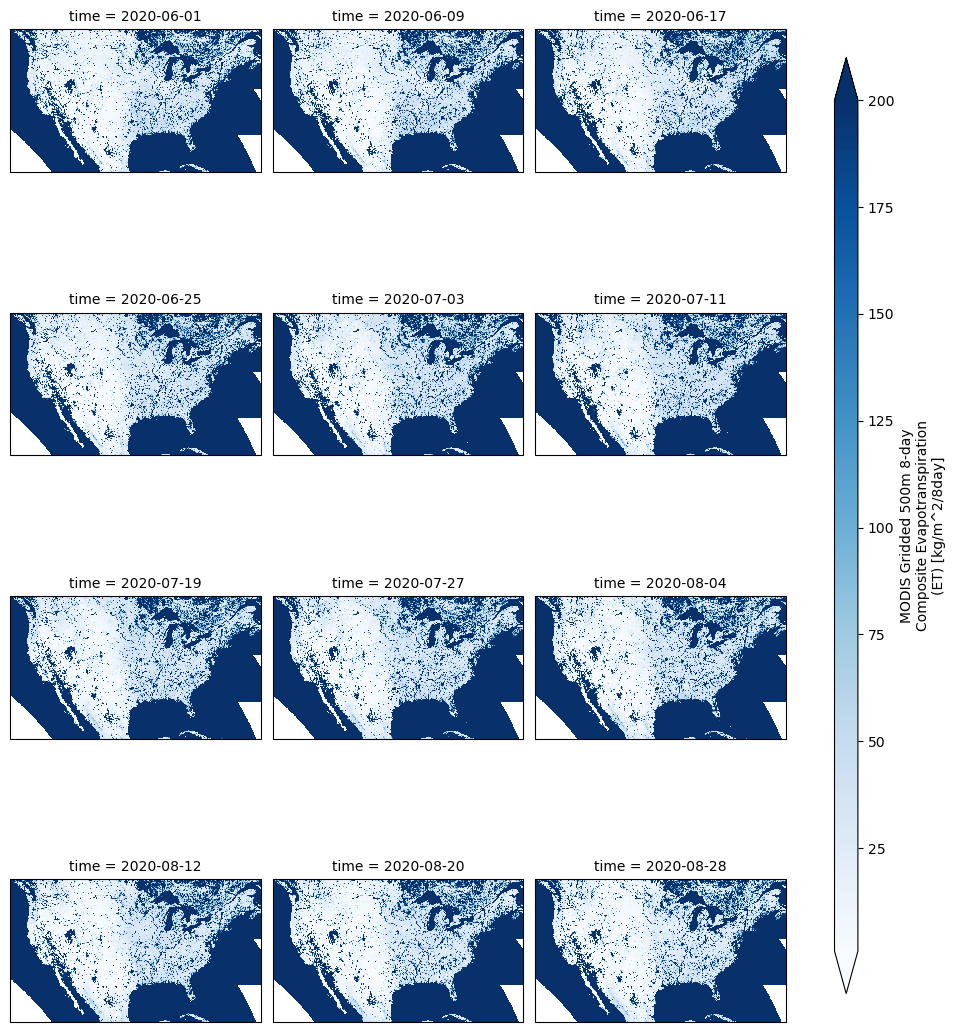

In [39]:
fig=ds2['ET_500m'].sel(time=slice('2020-06-01','2020-08-31')).plot(
    col="time",
    col_wrap = 3,
    transform=ccrs.PlateCarree(),  # remember to provide this!
    subplot_kws={"projection": ccrs.Mercator()},
    cmap='Blues',
    robust=True,
    vmax = 200,
    cbar_kwargs={"orientation": "vertical", "shrink": 0.8, "aspect": 40},
)

### Task 7: Drought Challenge

Here is some information about [Evapotranspiration](https://www.nasa.gov/missions/landsat/evapotranspiration-watching-over-water-use/)

How would you expect evapotranspiration to behave during drought? 

Discuss with your team on how to investigate this using the skills you have learned. 

(Hint: A useful tool can be the [Evaporative Stress Ratio (ESR)](https://www.drought.gov/data-maps-tools/evaporative-stress-index-esi), which is the ratio between Evapotranspiration and Potential Evapotranspiration:

$ESR = \frac{ET}{PET}$


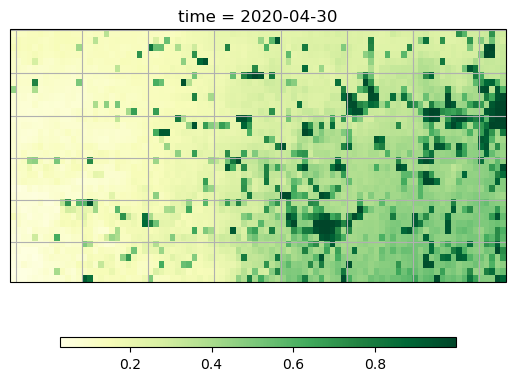

In [40]:
# One approach could be to plot the ESR for the same times that we found the drought in Kansas 
# And indeed we see lower values during 2023, which means that the land-surface was quite a bit drier. 
Kansas =[ -102.052894,36.992751,-94.590752,40.002896]
ax = plt.axes(projection=ccrs.Mercator())
ESR = ds2.ET_500m / ds2.PET_500m 
ESR_Kansas = ESR.sel(lat=slice(Kansas[3], Kansas[1]),lon=slice(Kansas[0], Kansas[2]))
ESR_Kansas.sel(time='2020-04-30').plot(ax=ax, 
                                                transform=ccrs.PlateCarree(),
                                                cbar_kwargs={"orientation": "horizontal", "shrink": 0.8, "aspect": 40},
                                                cmap='YlGn', )
ax.coastlines(); ax.gridlines(); 

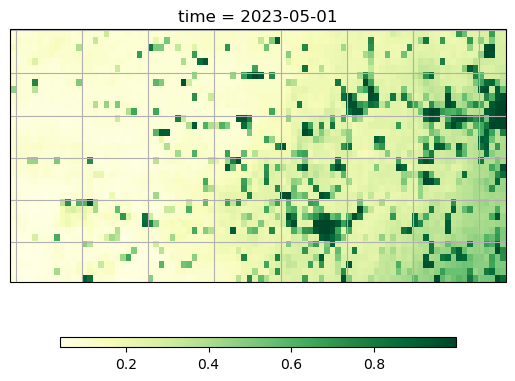

In [41]:
Kansas =[ -102.052894,36.992751,-94.590752,40.002896]
ax = plt.axes(projection=ccrs.Mercator())
ESR = ds2.ET_500m / ds2.PET_500m 
ESR_Kansas = ESR.sel(lat=slice(Kansas[3], Kansas[1]),lon=slice(Kansas[0], Kansas[2]))
ESR_Kansas.sel(time='2023-05-01').plot(ax=ax, 
                                                transform=ccrs.PlateCarree(),
                                                cbar_kwargs={"orientation": "horizontal", "shrink": 0.8, "aspect": 40},
                                                cmap='YlGn')
ax.coastlines(); ax.gridlines(); 